In [22]:
import numpy as np
from datetime import datetime as dt,timedelta
import xarray as xr
from lib import driver
from lib import dataset
import netCDF4 as nc
import matplotlib.pyplot as plt
from lib.tools import *
import pickle
import os

In [30]:
# ds = xr.open_dataset('/Projects/jalbers_process/CPC_LIM/yuan_ming/CPC/Images_hindcast_fold_10_seasonally_changing_vars_test/20110101/no_offset/SOIL/SOIL.20110101.nc')
ds = xr.open_dataset('/Projects/jalbers_process/CPC_LIM/yuan_ming/CPC/Images_hindcast_fold_10_seasonally_changing_vars_test/20110101/SOIL/SOIL.20110101.nc')
# os.system('ls -alt /Projects/jalbers_process/CPC_LIM/yuan_ming/CPC/Images_hindcast_fold_10_seasonally_changing_vars_test/20110101/SOIL/SOIL.20110101.nc')


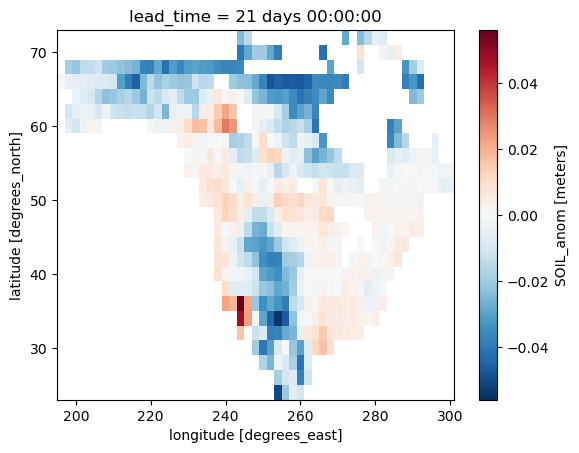

In [31]:
ds.SOIL_anom[0].where((ds.lat> 20) & (ds.lat<70 )&(ds.lon>190) & (ds.lon<305),drop=False)
ds.SOIL_anom[0].where(~np.isnan(ds.SOIL_anom[0]),drop=True).plot()

In [2]:
expt_name = '9b2_sliding_climo_no_double_running_mean'
LIMdriver = driver.Driver(f'namelist_retrospective_8_vars_{expt_name}.py')
LIMdriver.get_variables()

cyms file here
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-17_sliding_climo_CPCtemp.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-17_sliding_climo_SST.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-17_sliding_climo_SF750.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-17_sliding_climo_SF100.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-17_sliding_climo_T2m.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-17_sliding_climo_SLP.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_n

In [3]:
obj = LIMdriver.use_vars['SOIL']['data']
type(obj.running_mean)

numpy.ndarray

2016-12-31 00:00:00


/home/ycheng/LIM/CPC/run_code/lib/dataset.py:436: RuntimeWarning: Mean of empty slice
  zmap[ipole] = np.nanmean(zmap[tuple([ipole[0]-1,ipole[1]])])
/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


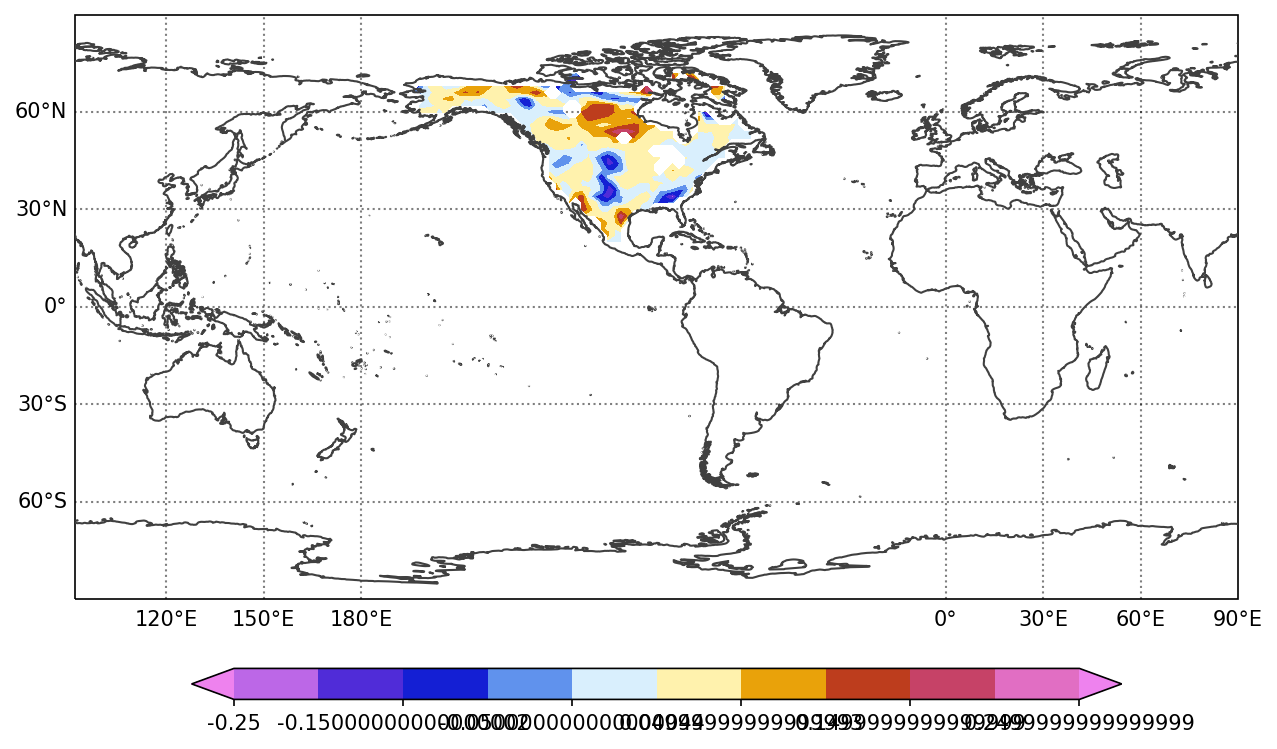

In [5]:
time = dt(2016,12,31)
# T_START = dt(2016,12,1) #dt(YEAR,MONTH,1) 
# T_END = dt(2016,12,1) #dt(YEAR,MONTH,LASTDAY)

# time = [T_START + timedelta(days=i) for i in range((T_END-T_START).days+1)]
print(time)
plot_properties={'latlon':(10,10),'levels':(-0.3,0.3),'contour_total':5,'time':time}
z = obj.running_mean[list(obj.time).index(time)]
# plot_properties={}
axes_instance = obj.plot_map(z = z,prop=plot_properties)

# Show the figure with the plot
# plt.show()
# np.nanmax(obj.running_mean)
# np.nanmin(obj.running_mean)
# np.nanmax()

In [6]:
# obj.latgrid[:,0]
# obj.longrid[0,:]
obj.running_mean.shape
zmap = [obj.regrid(daily) for daily in obj.running_mean]

In [7]:
np.asarray(zmap).shape

(21908, 91, 180)

In [8]:
ds = xr.Dataset(
    {"soil": (("time", "lat", "lon"), zmap)},
    coords={"time": obj.time, "lat": obj.latgrid[:,0],"lon": obj.longrid[0,:]},
    attrs={"description": "soil"},
)

In [ ]:
ds

In [9]:
from cartopy import crs as ccrs

def plot_map(time_index, contour_levels, lat_bounds, lon_bounds):
    fig, ax = plt.subplots()
    ds.soil.sel(time=time).plot.contourf(ax=ax, levels=contour_levels, projection=ccrs.PlateCarree())
    ax.set_xlim([lon_bounds[0], lon_bounds[1]])
    ax.set_ylim([lat_bounds[0], lat_bounds[1]])
    # return plot


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas/_libs/index.pyx", line 548, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 2263, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 2273, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1514764800000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 516, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas/_libs/index.pyx", line 550, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2018-01-01 00:00:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/ycheng/.conda/envs/

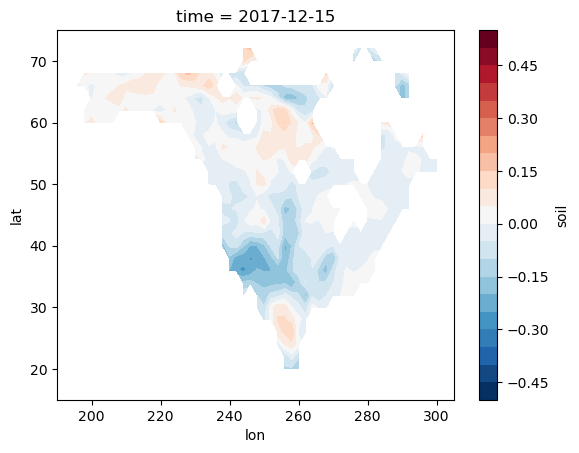

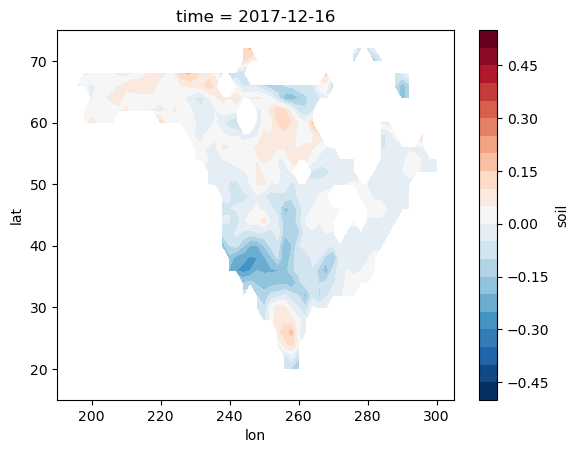

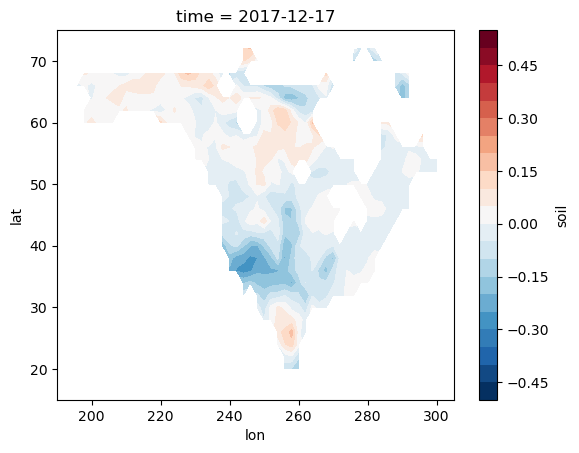

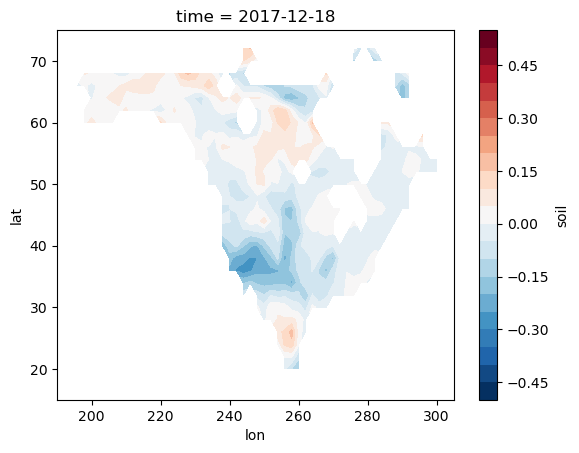

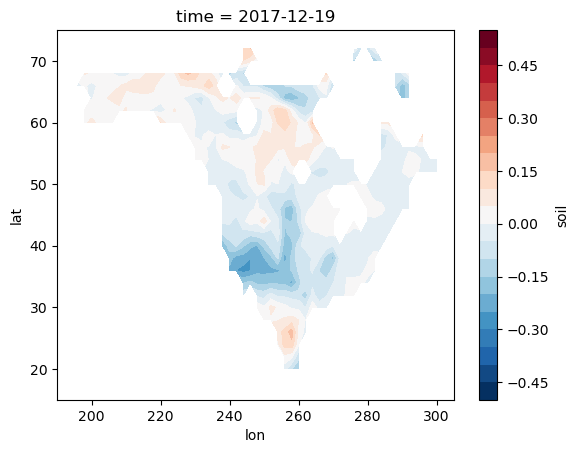

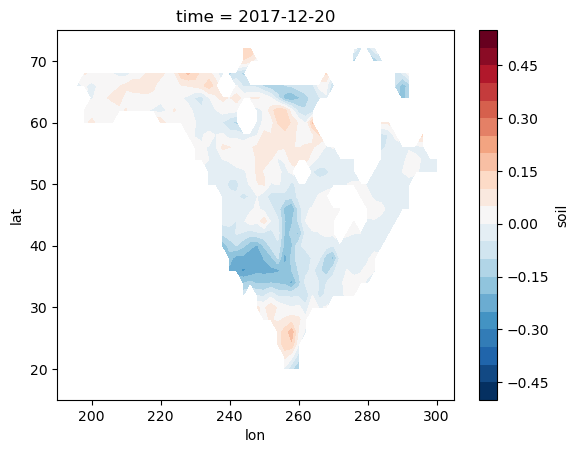

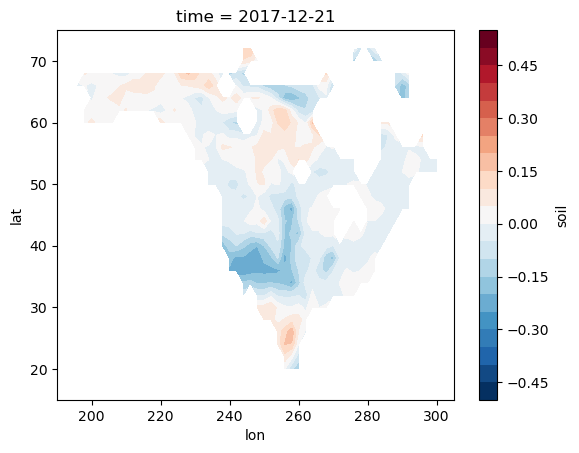

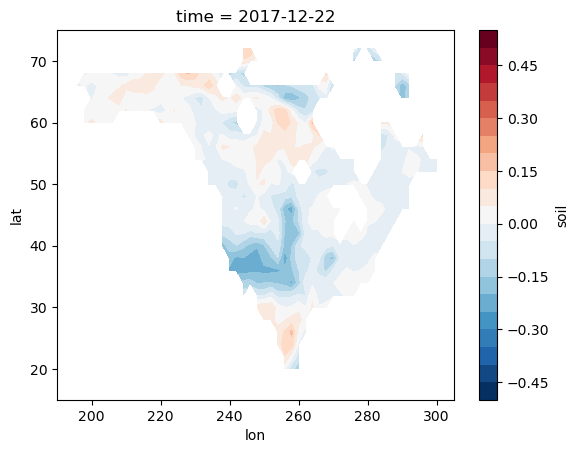

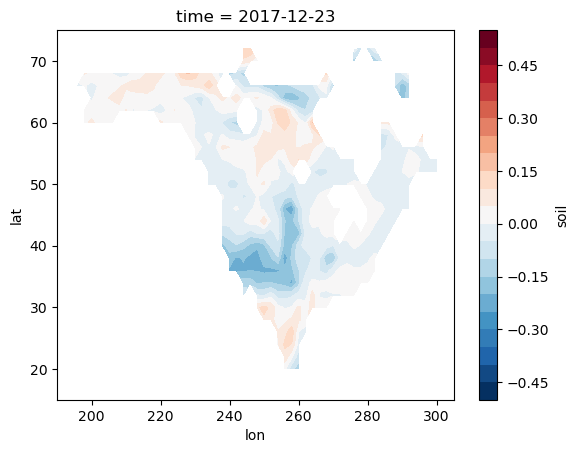

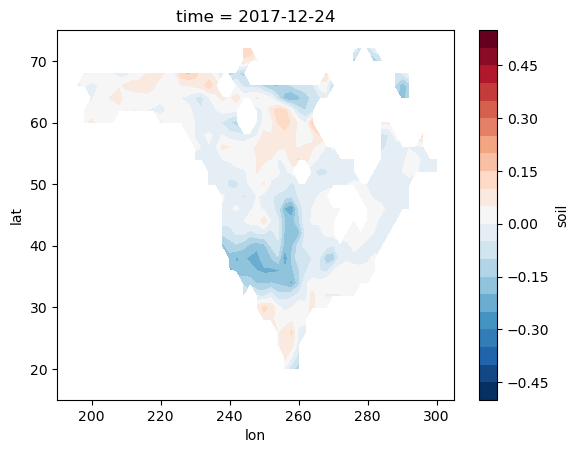

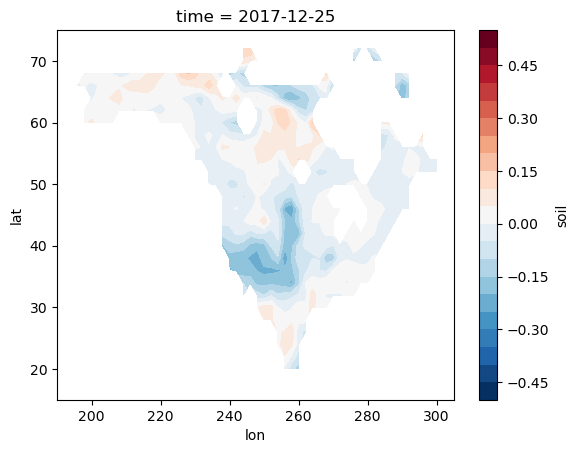

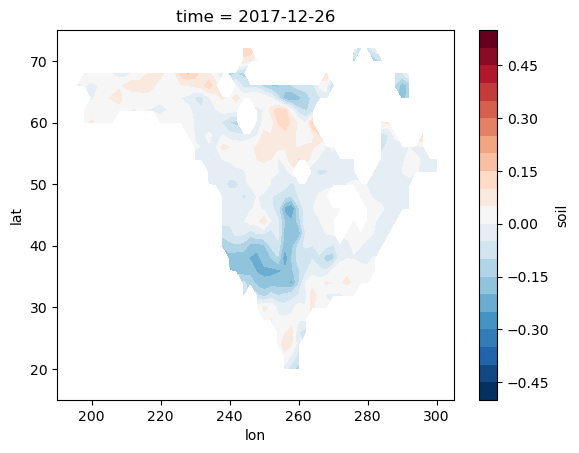

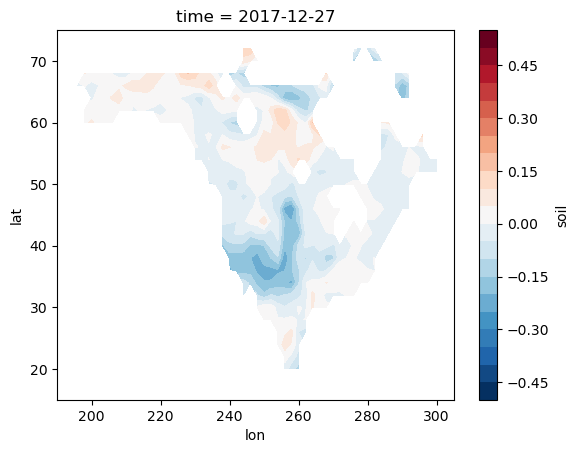

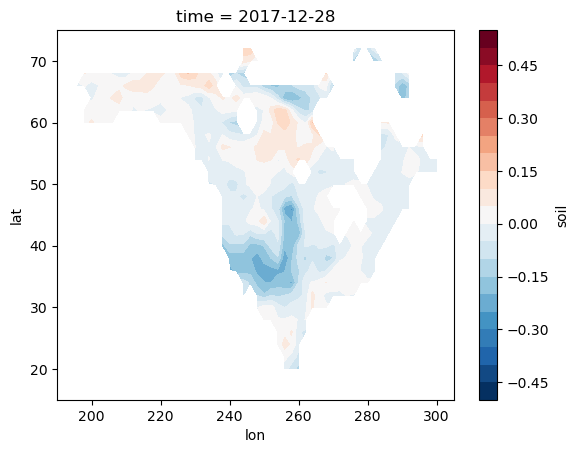

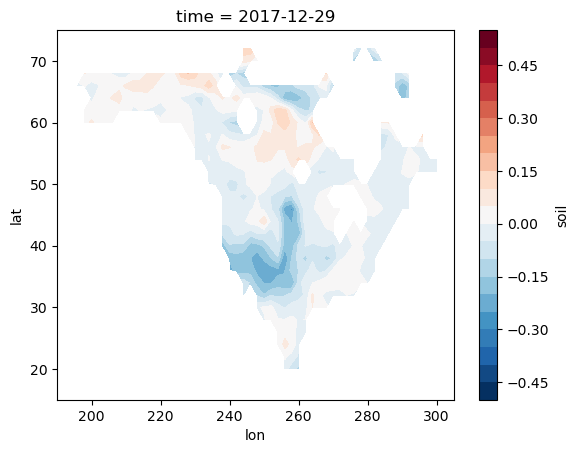

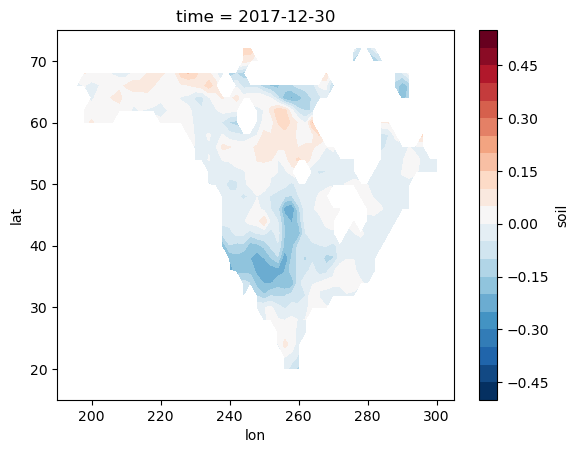

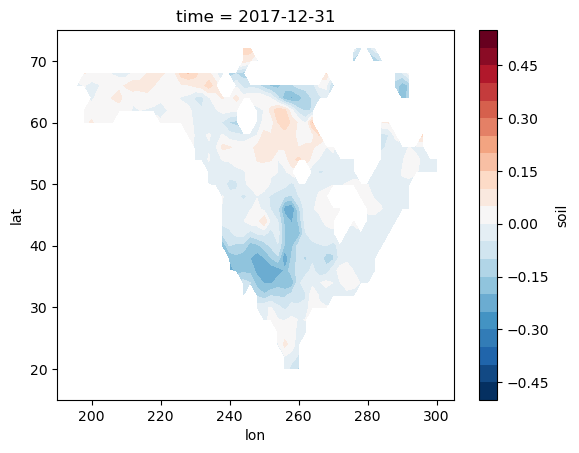

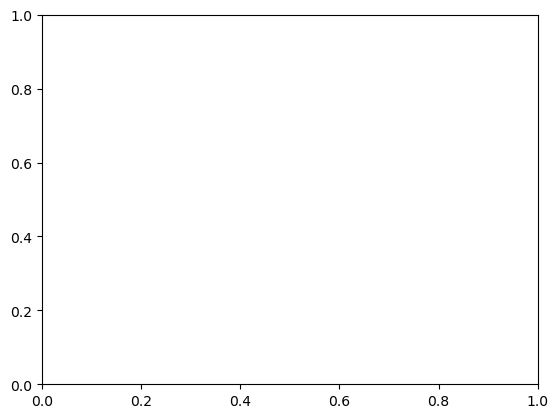

In [18]:
# T_START = dt(2016,1,1) #dt(YEAR,MONTH,1) 
# T_END = dt(2016,1,31) #dt(YEAR,MONTH,LASTDAY)
T_START = dt(2017,12,15) #dt(YEAR,MONTH,1) 
T_END = dt(2018,1,1) #dt(YEAR,MONTH,LASTDAY)
times = [T_START + timedelta(days=i) for i in range((T_END-T_START).days+1)]

contour_levels = np.arange(-0.5,0.6,0.05)  # Replace with your desired contour levels
lat_bounds = [15, 75]  # Replace with your desired latitude boundaries
lon_bounds = [190, 305]   # Replace with your desired longitude boundaries

# Plot the data
for time in times:
    plot_map(time, contour_levels, lat_bounds, lon_bounds)
# def animate(frame):
#     plt.clf()  # Clear the current plot
#     return plot_map(frame, contour_levels, lat_bounds, lon_bounds)

# animation = FuncAnimation(fig, animate, frames=total_frames, repeat=False)
plt.close()

In [16]:
ds = xr.open_dataset('/home/ycheng/LIM/CPC/run_code/test_soil/anl_land125.2023092300.cheng703360.nc')

In [19]:
ds['lv_ULN1'].sel(lv_ULN1=slice(1,2))

<xarray.DataArray 'lv_ULN1' (lv_ULN1: 2)>
array([1, 2], dtype=int32)
Coordinates:
  * lv_ULN1  (lv_ULN1) int32 1 2
Attributes:
    units:      number
    long_name:  underground layer number of land surface model

In [9]:
ds['ussl'].sel(latitude=slice(90,0))

<xarray.DataArray 'ussl' (time: 212, latitude: 73, longitude: 288)>
[4457088 values with dtype=float32]
Coordinates:
    number     int64 ...
    step       timedelta64[ns] ...
  * latitude   (latitude) float64 90.0 88.75 87.5 86.25 ... 3.75 2.5 1.25 0.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-07-31

In [11]:
ds['latitude'].sel(latitude=slice(90,80))

<xarray.DataArray 'latitude' (latitude: 9)>
array([90.  , 88.75, 87.5 , 86.25, 85.  , 83.75, 82.5 , 81.25, 80.  ])
Coordinates:
    number    int64 ...
    step      timedelta64[ns] ...
  * latitude  (latitude) float64 90.0 88.75 87.5 86.25 ... 83.75 82.5 81.25 80.0
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

In [15]:
slice(0,10)

slice(0, 10, None)